<a href="https://colab.research.google.com/github/ojuraev/Python/blob/master/DecisionTrees_no_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Colab environment detected.


In [4]:
mowers_df = pd.read_csv('RidingMowers.csv')

In [5]:
mowers_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


<Axes: xlabel='Income', ylabel='Lot_Size'>

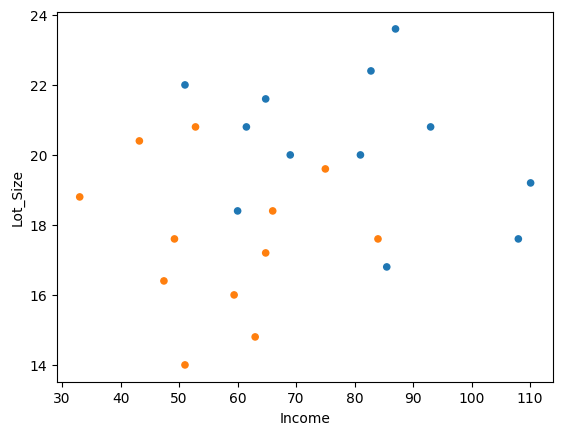

In [6]:
%matplotlib inline
# scatter plot of Lot Size vs. Income
mowers_df.plot.scatter(x='Income', y='Lot_Size',
c=['C0' if c == 'Owner' else 'C1' for c in mowers_df.Ownership])

Classes: Nonowner, Owner


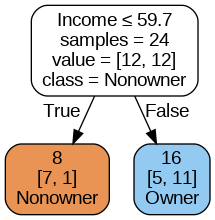

In [9]:
mower_df = pd.read_csv('RidingMowers.csv')
# use max_depth to control tree size (None = full tree)
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree,feature_names=mower_df.columns[:2], class_names=classTree.classes_)

Classes: Nonowner, Owner


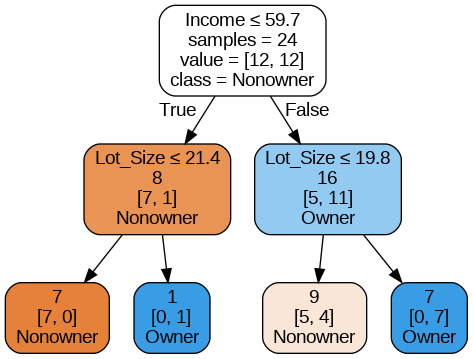

In [10]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree,feature_names=mower_df.columns[:2], class_names=classTree.classes_)

Classes: Nonowner, Owner


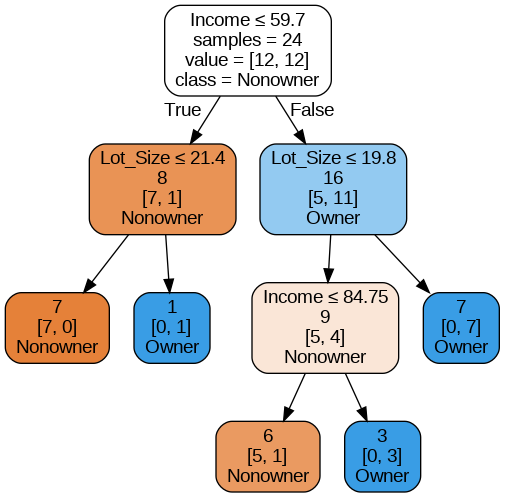

In [11]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree,feature_names=mower_df.columns[:2], class_names=classTree.classes_)

In [12]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [13]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
bank_df['Personal Loan'].value_counts()

,count
Personal Loan,
0,4520
1,480


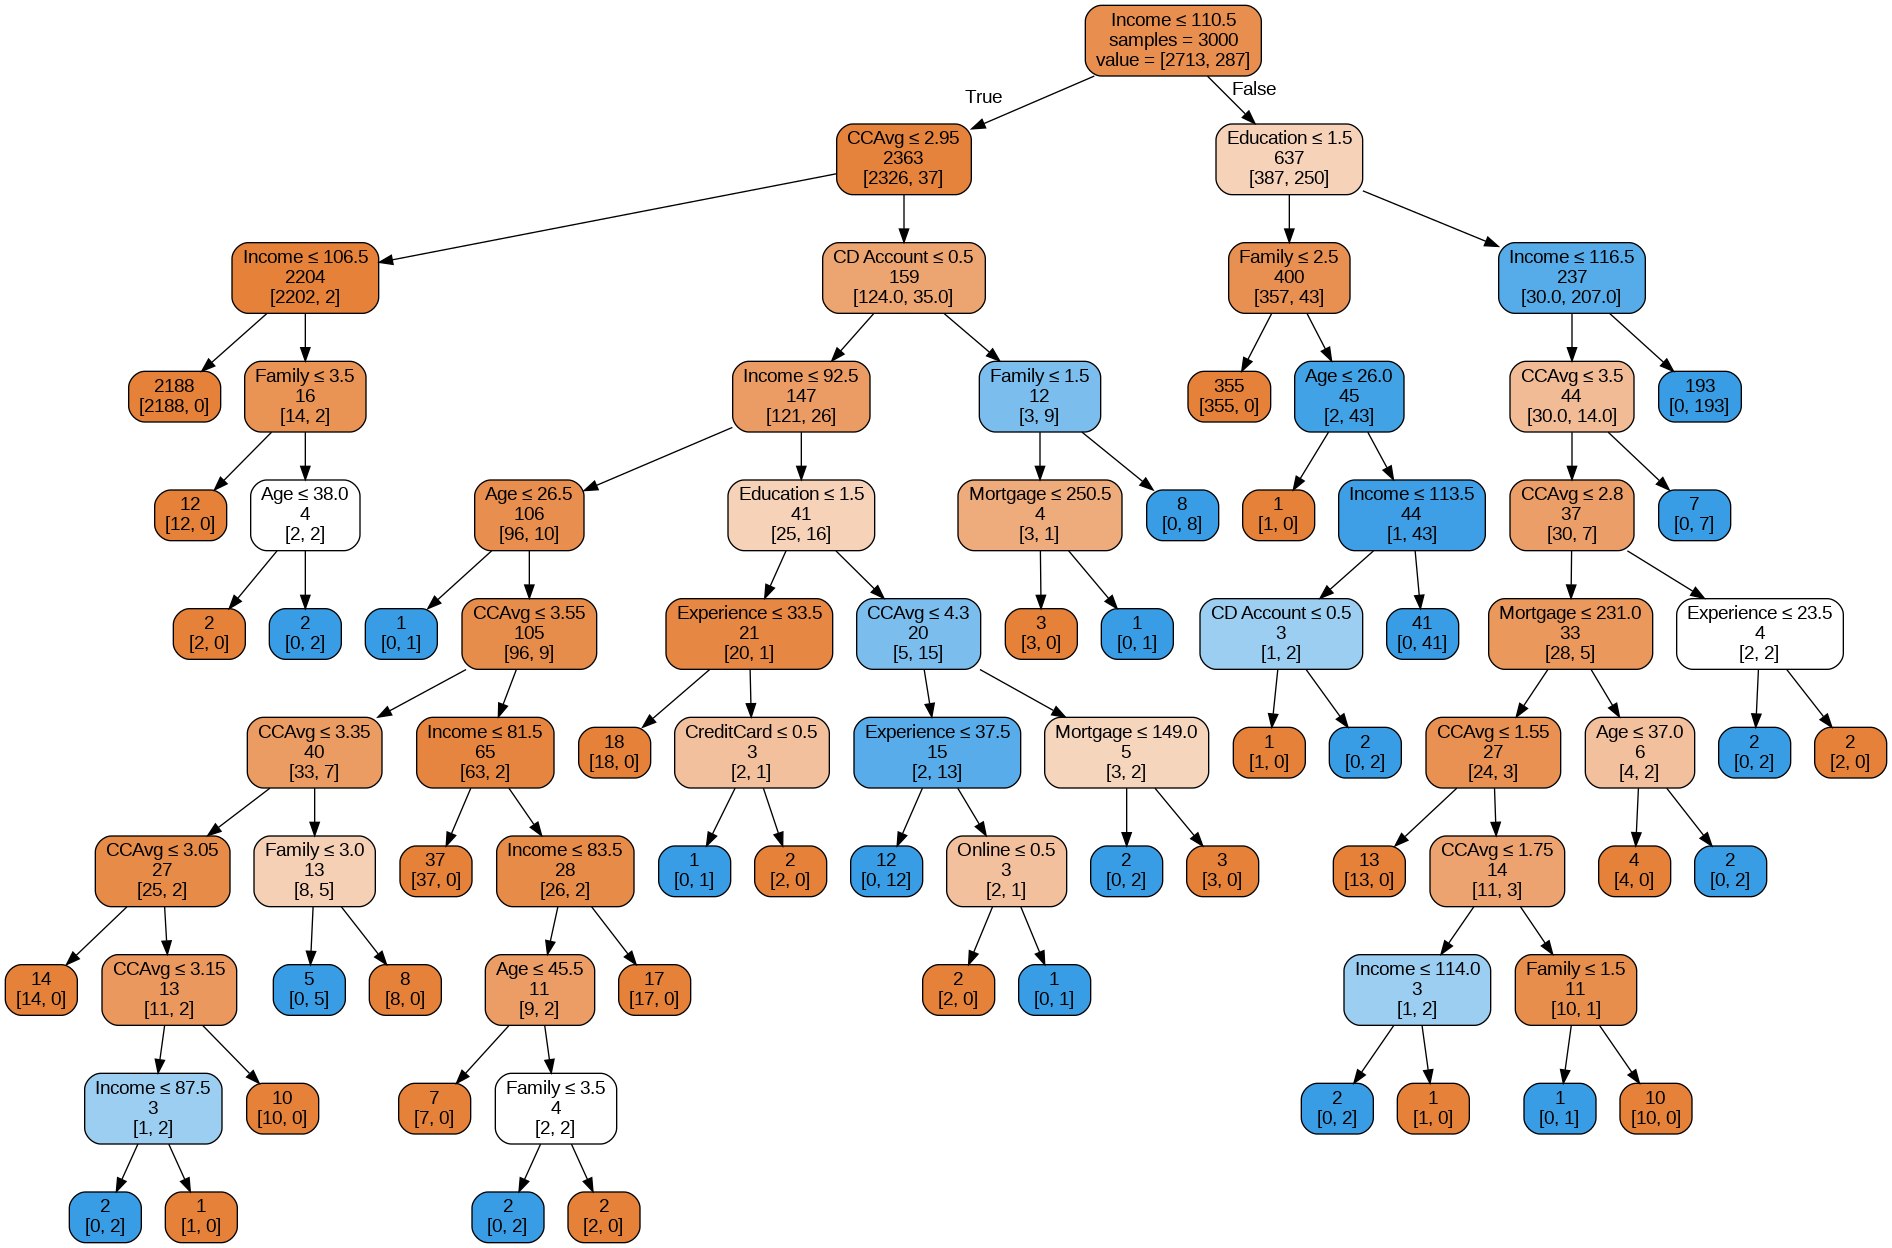

In [15]:
bank_df.drop(columns=['ID','ZIP Code'], inplace=True)

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,  random_state=1)

fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree,feature_names=train_X.columns)

In [16]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


In [ ]:
#cross validation

treeClassfier = DecisionTreeClassifier(random_state=1)

scores = cross_val_score(treeClassfier, train_X, train_y, cv=5)
print('Accuracy scores of each fold:', [f'{acc:.3f}' for acc in scores])

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [ ]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

In [ ]:
# Start with an initial guess for parameters
param_grid = {
  'max_depth': [10, 20, 30, 40],
  'min_samples_split': [20, 40, 60, 80, 100],
  'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
# Which values are best?
# n_jobs=-1 will utilize all available CPUs
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
   param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)



In [17]:
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(2, 16)), # 14 values
'min_samples_split': list(range(10, 22)), # 11 values
'min_impurity_decrease': [0.0009, 0.001, 0.0011], # 3 values
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
    param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


In [19]:
from sklearn.tree import DecisionTreeRegressor
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv')
toyotaCorolla_df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [25]:
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'Tax'})

predictors = ['Age','KM','Fuel_Type','HP','Met_Color','Automatic','CC','Doors','Tax','Weight']
outcome = 'Price'

X =pd.get_dummies(toyotaCorolla_df[predictors],drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size = 0.4, random_state =1)



In [22]:
param_grid = {
  'max_depth': [5, 10, 15, 20, 25],
  'min_samples_split': [10,20,30,40,50],
  'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs =-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters:', gridSearch.best_params_)

Initial parameters: {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [23]:
param_grid = {
  'max_depth': [5, 10, 15, 20, 25],
  'min_samples_split': [10,20,30,40,50],
  'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs =-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters:', gridSearch.best_params_)

Initial parameters: {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}


Mean Squared Error: 1361025.5125184217


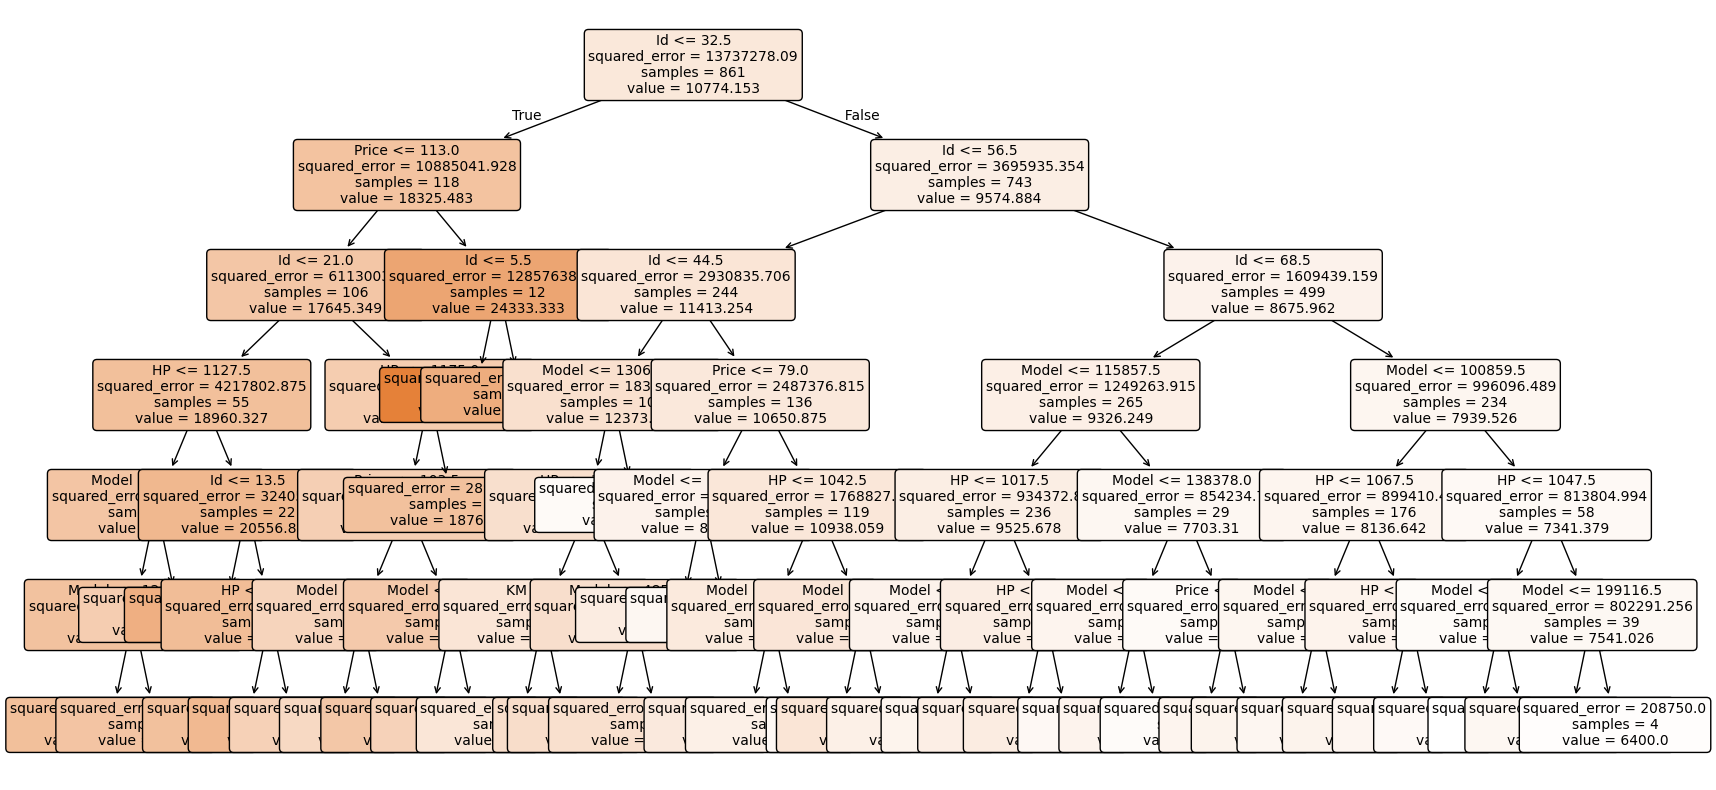

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.tree import plot_tree


# Generate DecisionTreeRegressor model.
best_params = {'max_depth': 6, 'min_impurity_decrease': 0.01, 'min_samples_split': 12}
regressor = DecisionTreeRegressor(**best_params)

# Fit the training data
regressor.fit(train_X, train_y)

# Predict using validation data
predictions = regressor.predict(valid_X)

# Calculate MSE
mse = mean_squared_error(valid_y, predictions)
print('Mean Squared Error:', mse)

# Visualize the trained decision tress
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=toyotaCorolla_df.columns, rounded=True, fontsize=10)
plt.show()